# Tarea5

Claudio Pierard [@cpierard](https://github.com/cpierard)

**Envío del PR inicial:** lunes 17 de octubre

**Aceptación del PR:** lunes 31 de octubre

**Ejercicio 1:**

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el exponente de Lyapunov en términos de $c$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores
de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

In [32]:
using Plots, LaTeXStrings, DualNumbers

pyplot(grid=:false, size=(400,267))

Plots.PyPlotBackend()

In [2]:
Q_c(x,c) = x^2 + c
Q_c´(x) = 2*x

Q_c_2(x,c) = (x^2 + c)^2 + c

Q_c_2 (generic function with 1 method)

In [3]:
"""
    iterator(f::Function, n::Int, k::Int, x0, c)

La función `iterator` toma una función `f` y la itera `n` veces sin guardar ningún dato, y luego `k` veces guardando
los puntos de la órbita en una arreglo. Necesita una condición inicial `x0` y un parametro c, ya que la función debe
ser del tipo `f(x,c)`.

"""

function iterator(f::Function, n::Int, k::Int, x0, c)

    solution = Float64[]
    #steps = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(x_old, c)
        x_old = x_new

    end
    
    for i in 1:k
        
        x_new = f(x_old, c)
        push!(solution, x_old)
        x_old = x_new

    end
    
    return solution

end

iterator (generic function with 1 method)

In [4]:
"""
    lyapunov_exponent(Xi)

Toma un arreglo con n elementos de una órbita, con esos elemetos se calcula el exponente de Lyapunov de esa órbita.
"""

function lyapunov_exponent(Xi)
    
    σ = 0.0
    n = length(Xi)
    
    for i in 1:n
        
        σ += log(abs(Q_c´(Xi[i])))
        
    end
    
    λ = 1/n * σ
    
end

lyapunov_exponent (generic function with 1 method)

> Abajo probamos la función `lyapunov_exponent`, para la función `Q_c` declarada al principio del ejercicio, con $c = -1.5$.

In [5]:
orb_1 = iterator(Q_c, 100, 1000, 0.0, -1.5)

1000-element Array{Float64,1}:
 -0.248334 
 -1.43833  
  0.568794 
 -1.17647  
 -0.115911 
 -1.48656  
  0.709875 
 -0.996078 
 -0.507829 
 -1.24211  
  0.0428369
 -1.49817  
  0.744498 
  ⋮        
 -0.0567696
 -1.49678  
  0.740342 
 -0.951894 
 -0.593898 
 -1.14728  
 -0.183738 
 -1.46624  
  0.649861 
 -1.07768  
 -0.338604 
 -1.38535  

In [6]:
lyapunov_exponent(orb_1) # Caos

0.25999766464274

> El exponente de Lyapunov es positivo, eso implica que esta órbita es caótica.

> Se vuelve a hacer lo mismo para $c = 1.401$. Sabemos de la tarea anterior que para este parámetro, la órbita no es caótica.

In [7]:
orb_2 = iterator(Q_c, 100, 1000, 0.0, -1.2)
lyapunov_exponent(orb_2) #no caos

-0.11157177942474457

In [8]:
orb_3 = iterator(Q_c, 15000, 14500, 0.0, -1.401)
lia_3 = lyapunov_exponent(orb_3) # El exponente de Lyapunov es negativo => no hay caos.

-0.018692862862578284

> Ahora se quiere hacer lo mismo, pero para las órbitas que corresponde a los parámetro $c$ en el rango $[0.25, -2.0]$.

In [9]:
"""
    lyapunov_c_range(c_range)

Esta función toma un rango para los parámetros `c`, i calcula todo los exponentes de Lyapunov correspondientes a 
las órbitas de cada parámetro. Regresa un arreglo con todos los exponentes calculados.
"""

function lyapunov_c_range(c_range)
    
    lyapunov = Float64[]
    
    for i in c_range
        
        orb = iterator(Q_c, 100, 1000, 0.0, i)
        exponent = lyapunov_exponent(orb)
        push!(lyapunov, exponent)
        
    end
    
    lyapunov
    
end     

lyapunov_c_range (generic function with 1 method)

In [10]:
c_rango = 0.25:-0.001:-2.0
lyap_exponentes = lyapunov_c_range(c_rango);

> Graficamos los exponentes $\lambda(x)$ correspondientes a cada $c$, en el rango $[0.25, -2.0]$.

[Plots.jl] Initializing backend: pyplot



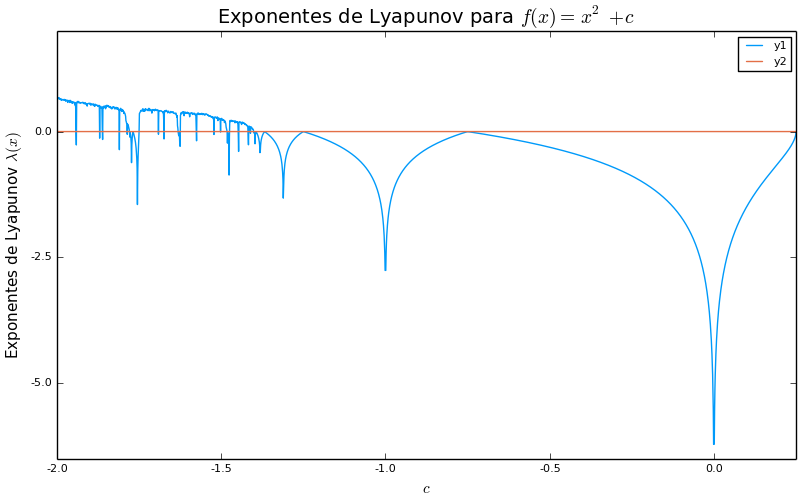

In [11]:
plot(c_rango, lyap_exponentes, ylim=(-6.5, 2), size=(800, 500), xlabel=(L"$c$"), 
    ylabel = (L"Exponentes de Lyapunov $\lambda(x)$"),
    title=(L"Exponentes de Lyapunov para $f(x) = \ x^2 + c$"))

plot!(c_rango, zeros(length(lyap_exponentes)))

**Respuesta**

> Observamos que para valores de c donde hay bifurcaciones se alcanza el valor 0. Esto se debe a que las derivadas se van acercando a cero justo antes de darse el punto de bifurcación, ahí se puede ver un 'pico', en esencia las dos derivadas correspondientes a la bifurcación.

> Sin embargo, en los ciclos superestables vemos que hay una tendencia hacia $-\infty$ en los valores de los exponentes -- esto lo podemos atribuir a que los sitios que rodean acaban siendo atraídos.

**Ejercicio 2:**

Rehacer los cálculos de los exponentes de Feigenbaum,
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la `Tarea4`.)

> En la tarea 4, se observó que también se puede usar los puntos de superestabilidad para calcular las constante de Feigenbaum. Es mejor tomar estos, porque es más fácil detectarlos númericamente usando sus exponentes de Lyapunov, ya que los exponentes correspondientes a los puntos de bifurcación sólo se acercan a cero con valores del orden $10^-5$, mientras que para los puntos superestables, los exponentes valen $-\infty$.

In [12]:
c_range = 0.25:-0.00001:-2.0
λ = lyapunov_c_range(c_range)

225001-element Array{Float64,1}:
 -0.00469562
 -0.00778096
 -0.00996958
 -0.0117704 
 -0.0133403 
 -0.014752  
 -0.0160465 
 -0.0172495 
 -0.0183783 
 -0.0194455 
 -0.0204604 
 -0.0214302 
 -0.0223604 
  ⋮         
  0.687652  
  0.689256  
  0.690213  
  0.688353  
  0.690988  
  0.688388  
  0.691031  
  0.692535  
  0.692661  
  0.688559  
  0.691647  
  1.38629   

In [13]:
"""
    search_minus_inf(A, rango)

La función busca los puntos superestables, buscando los valores `-Inf`. Para detectar un punto superestable, se
busca que éste sea el menor exponente entre sus vecinos, es decir, que sea el mínimo local entre tres valores.
`A` es el arreglo con los exponentes, y `rango` es el rango de parámetros c que corresponde a los exponentes en `A`.
"""

function search_minus_inf(A, rango)
    
    B = Any[]
    
    for i in 2:length(A) - 1
        
        if A[i] < A[i-1] && A[i] < A[i+1]
            
            push!(B, rango[i])
            
        end
        
    end
    
    B
    
end         

search_minus_inf (generic function with 1 method)

In [14]:
λ_stability = search_minus_inf(λ, c_range)

17979-element Array{Any,1}:
  0.0    
 -1.0    
 -1.3107 
 -1.38155
 -1.39695
 -1.40025
 -1.40096
 -1.40111
 -1.40115
 -1.40119
 -1.40122
 -1.40125
 -1.40131
  ⋮      
 -1.99963
 -1.99967
 -1.9997 
 -1.99973
 -1.99976
 -1.99978
 -1.9998 
 -1.99984
 -1.99989
 -1.99992
 -1.99994
 -1.99998

> Se calularon más de $17$ mil puntos, sin embargo no todos cumplen con la condición de superestabilidad. Para los valores más chicos que $-1.42$, hay caos, y el método con el que se usó en `search_minus_inf` (explicado en la descripción de la función), no puede descartar las oscilaciones que hay en los exponentes en la zona caótica. Por eso sólo usé los primeros 7 elementos.

In [15]:
"""
    feigenbaum_const(A)

Esta función calcula los exponentes dada un arreglo `A` con los puntos de bifurcación o de superestabilidad.
"""

function feigenbaum_const(A)
    ratio = Float64[]
    
    for i in 3:length(A)
        
        r = (A[i-1][1] - A[i-2][1])/(A[i][1] - A[i-1][1])
        push!(ratio, r)
        
    end
    
    ratio
    
end

feigenbaum_const (generic function with 1 method)

In [16]:
d_feigenbaum = feigenbaum_const(λ_stability[1:9])

7-element Array{Float64,1}:
 3.21854
 4.38532
 4.60065
 4.66667
 4.64789
 4.73333
 3.75   

> En la tabla de abajo se expone las proporciones que tienden hacia la constante de Feigenbaum. Se puede observar que los últimos valores no son buenos, esto se debe a que la resolución de nuestro rango de parámetros $c$ es muy grande.


| n | Periodo | Proporción |
|:---------- | ---------- |:------------:|
| `1` | 2 | - |
| `2` | 4 | - |
| `3` | 8 | 3.21854 |
| `4` | 16 | 4.38532 |
| `5` | 32 | 4.60065 |
| `6` | 64 | 4.66667 |
| `7` | 128 | 4.64789 |
| `8` | 256 | 4.73333 |
| `9` | 512 | 3.75 |

In [19]:
"""
    itera_funcion_anonym(n)

Esta función declara una función anonima tipo `f(x,c) = x^2 + c`. Variando el parametro n (con n ∈ Naturales), la 
función declara una función anónima de la composición de la función f con sigo misma, un n número de veces. Ejemplo:

n = 3
f_out = ((x^2 + c)^2 + c)^2 + c

"""


function itera_funcion_anonym(n)
    
    x = "x^2 + c"

    for i in 1:n-1

        x = "($x)^2 +c"

    end

    ex = parse(x)
    ex_ret = :( (x, c) -> $ex )
    eval(ex_ret)
end

itera_funcion_anonym (generic function with 1 method)

> Abajo se hace el cálculo de la segunda constante.

In [20]:
a = Any[]
n = 0

for i in 2:length(1:9)
    
    puntos = iterator(itera_funcion_anonym(2^n), 10, 2, 0.0, λ_stability[i])
    push!(a, puntos)
    n += 1
    
end

a

8-element Array{Any,1}:
 [0.0,-1.0]                                      
 [4.580336590453982e-6,0.40723448994500444]      
 [7.988005323200653e-6,-0.16343264585949369]     
 [-2.73788545477327e-5,0.0653882356460942]       
 [-3.394046301297138e-5,-0.026090465261151552]   
 [4.042524059544306e-5,0.010400241227898732]     
 [-0.00015064408291953768,-0.0040328837400029904]
 [-0.0002460910006032435,0.0018706802220109786]  

In [21]:
#Calculamos esas proporciones

α_constant = Float64[]

for i in 1:length(a)-1
    
    α = abs(a[i][2] / a[i+1][2])
    push!(α_constant, α)
    
end

α_constant

7-element Array{Float64,1}:
 2.45559
 2.49176
 2.49942
 2.50621
 2.50864
 2.57886
 2.15584

> Igual que arriba, los últimos valores no son muy buenos por la resolución de nuestro rango de $c$.

| P. Estable | Proporción |
|:------------:|:------------:|
| 0.0 | - |
| -1.0 | 2.45559 |
| -1.3107 | 2.49176 |
| -1.38155 | 2.49942 |
| -1.39695 | 2.50621 |
| -1.40025 | 2.50864 |
| -1.40096 | 2.57886 |
| -1.40111 | 2.15584 |

**Ejercicio 3:**

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$. 


### Solución 

- $Q_{c}(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$:


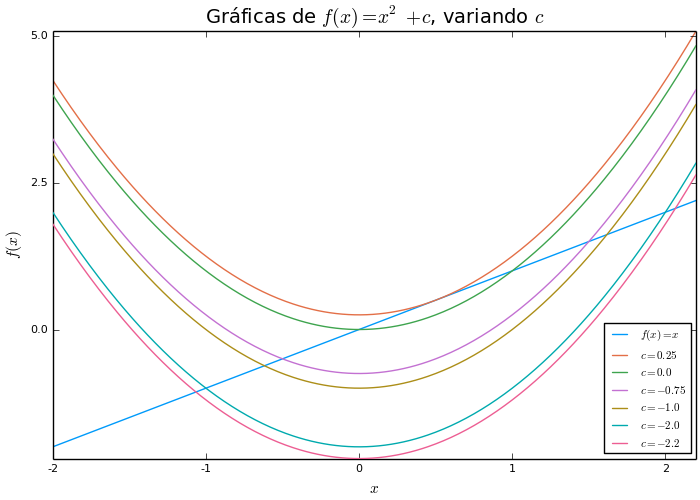

In [22]:
rango= -2:0.01:2.2
c = [+1/4, +0, -3/4, -1, -2, -2.2]
plot(rango, identity, size=(700,500), label=(L"f(x) = x"))
for i in c
    string_c = "$(i)"
    plot!(rango, x -> x^2 + i, label=(latexstring(string("c = ", string_c))))
end
title!(L"Gráficas de $f(x) = x^2 + c$, variando $c$")
xlabel!(L"x")
ylabel!(L"f(x)")
>plot!()

> Se observa que conforme el parámetro $c$ decrece, pasa de haber un punto fijo a dos, y estos se empiezan a alejar, conforme $c$ sigue decreciendo.

- $Q_{c^\prime}^2(x)$ para $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$:


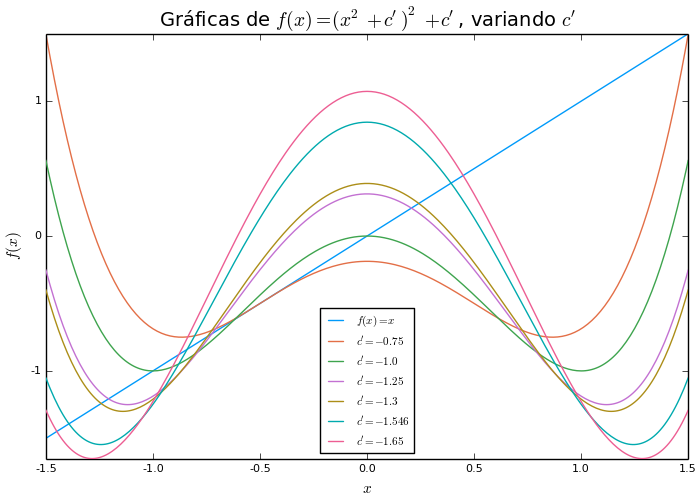

In [23]:
rango= -1.5:0.01:1.5
c´ = [-3/4, -1, -5/4, -1.3, -1.546, -1.65]
plot(rango, identity, size=(700,500), label=(L"f(x) = x"))
for i in c´
    string_c = "$(i)"
    plot!(rango, x -> (x^2 + i)^2 + i, label=(latexstring(string("c' = ", string_c))))
end
title!(L"Gráficas de $f(x) = (x^2 +c^\prime)^2 + c^\prime$, variando $c^\prime$")
xlabel!(L"x")
ylabel!(L"f(x)")
plot!()

> Arriba se muestra cómo varía el segundo iterado de la función $Q_c$ conforme variamos el parámetro $c$. Se observa que conforme disminuye $c$, pasa de haber dos puntos críticos (intersección con la identidad), a haber 4 puntos fijos. Mientras c decrece, estos 4 puntos empiezan a alejarse más entre sí. 

**Ejercicio 4:**

Estudiar la dinámica para $c=-2.2$

- ¿Cómo se caracteriza el valor al que tiende *casi* cualquier condición inicial en el
intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)

- Caractericen los subconjuntos de $I$ tales que, después de $n=1,2,3,\dots$ iterados de $Q_c(x)$, su intersección con $I$ es vacía.

- Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?

> Primero hay que encontrar los puntos fijos de la función $f(x) = x^2 - 2.2$.

In [26]:
f_3(x) = x^2 - 2.2

f_3 (generic function with 1 method)

In [30]:
"""
    compute_roots(f::Function, x0)

Esta función calcula los puntos fijos del sistema usando el método de Newton, con 10000 iterados. `F` es
la función que determina la dinámica del sistema, y `x0` es la condición inicial para el método.
"""
function compute_roots(f::Function, x0)
            
    #roots= Float64[c0]
    xi = Dual(x0, 1)

            # 1000 iterations of Newton's method
    for i in 1:10000

        x_2 = realpart(xi) - (realpart(f(xi) - xi)) / (dualpart(f(xi)) - 1)
        #push!(roots, c_2)
        xi = Dual(x_2, 1)
    end

    #roots
    realpart(xi)
end

"""
    iterador(f::Function, n::Int, k, x0)

Para funciones de tipo `f(x)`, es decir un sólo parámetro. `n` es el número de iterados que no se guardan.
`k` es el número de iterados que la función guarda en un arreglo. `x0` es la condición inicial.
"""

function iterador(f::Function, n::Int, k, x0)

    solution = Float64[]
    #steps = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(x_old)
        x_old = x_new

    end
    for i in 1:k
        
        x_new = f(x_old)
        push!(solution, x_old)
        x_old = x_new

    end
    
    return solution

end

iterador (generic function with 1 method)


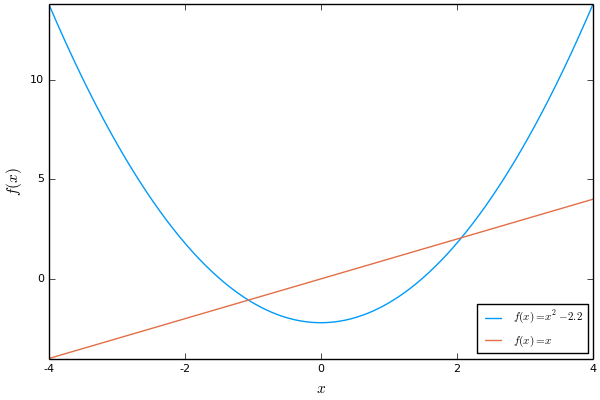

In [127]:
rango= -4:0.01:4
plot(rango, f_3, size=(600,400), label=(L"f(x) = x^2 -2.2"))
plot!(rango, identity, label=(L"f(x) = x"))
xlabel!(L"x")
ylabel!(L"f(x)")

> La grafíca sirve para tener una mejor noción para dar una condición inicial, para encontrar el punto fijo. `p_mas` es el punto fijo que nos interesa, ya que con este definimos el intervalo $I$.

In [52]:
p_mas = compute_roots(f_3, 2.0)

2.0652475842498528

In [53]:
p_menos = compute_roots(f_3, -1)

-1.0652475842498528

In [54]:
I_rango = -p_mas:1e-5:p_mas

-2.0652475842498528:1.0e-5:2.065242415750147

In [61]:
"""
    iterador_array(f::Function, n, k, x0_range)

La función itera los todos los valores en un rango `x0_range`, n veces sin guardan en la memoria y k guardando en
un arreglo.
"""

function iterador_array(f::Function, n, k, x0_range)
    iterados = Float64[]

    for x0 in x0_range

        xf = iterador(f, n, k, x0)
        push!(iterados, xf[1])

    end

    iterados
    
end

iterador_array (generic function with 1 method)

> Itero $1000$ veces para las condiciones inciales en el intervalo $I$.

In [62]:
iterados_f_3 = iterador_array(f_3, 1000, 1, I_rango)

413050-element Array{Float64,1}:
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
   ⋮
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf

In [128]:
n = 0 #n cuenta los valores en iterados_f_3 que son distintos de Inf.

for i in iterados_f_3
    
    if isinf(i) == false
        
        n += 1
    end
    
end

n       

0

> Después de muchos iterados, todos los valores con condciones inciales en $I$, divergen.

- Caracterización intersección con $I$.

Se marcó las condiciones iniciales para las cuales su n-ésimo iterado sale del intervalo $I$. 

In [109]:
"""
    interseccion_I(f::Function, rango, it)

Esta función marca las condiciones iniciales para las cuales sus iterados salen del rango `rango`, en `n` iteraciones. 
`f` es la función con la que se itera las condiciones iniciales. 
"""

function interseccion_I(f::Function, rango, it)
    
    interseccion = zeros(length(rango), it)
    
    for k in 1:it
        
        interseccion[:, k] = iterador_array(f, k-1, 1, rango)

        for i in 1:length(rango)

            if abs(interseccion[i, k]) > abs(rango[end])

                interseccion[i, k] = k

            elseif abs(interseccion[i, k]) <= abs(rango[end])

                interseccion[i, k] = NaN
            end

        end
        
    end
    
    interseccion
    
end 

interseccion_I (generic function with 1 method)

In [124]:
it_intersec = interseccion_I(f_3, I_rango, 10)

413050x10 Array{Float64,2}:
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   10.0
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     10.0
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      9.0   10.0
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      9.0   10.0
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      9.0   10.0
   ⋮                                  ⋮                       


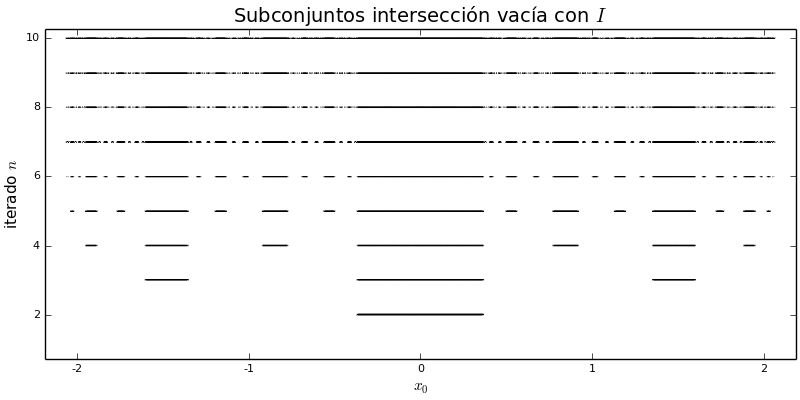

In [130]:
scatter(ylims=(0:11), legend=false, size=(800, 400))

for i in 1:length(it_intersec[1,:])

    scatter!(I_rango, it_intersec[:, i] , markersize=(0.001))
    
end
ylabel!(L"iterado $n$")
xlabel!(L"x_0")
title!(L"Subconjuntos intersección vacía con $I$")
scatter!()

> Arriba se muestra los subconjuntos intersección vacía con el conjunto $I$. Los puntos negros, son los iterados que ya no están en $I$. Se puede observar que conforme aumenta las iteraciones, más puntos son los que salen del intervalo.

- Caracterización complemento de la intersección de $I$.

Para este inciso, se hace lo opuesto, se va a marcar los puntos que se quedan en $I$, conforme se va iterando los valores.

In [129]:
"""
    complemento_interseccion_I(f::Function, rango, it)

Esta función marca las condiciones iniciales para las cuales sus iterados se quedan del rango `rango`, en `n` 
iteraciones. `f` es la función con la que se itera las condiciones iniciales. 
"""

function complemento_interseccion_I(f::Function, rango, it)
    
    interseccion = zeros(length(rango), it)
    
    for k in 1:it
        
        interseccion[:, k] = iterador_array(f, k-1, 1, rango)

        for i in 1:length(rango)

            if abs(interseccion[i, k]) < abs(rango[end])

                interseccion[i, k] = k

            elseif abs(interseccion[i, k]) >= abs(rango[end])

                interseccion[i, k] = NaN
            end

        end
        
    end
    
    interseccion
    
end 

complemento_interseccion_I (generic function with 1 method)

In [122]:
comple_int_I = complemento_interseccion_I(f_3, I_rango, 10)

413050x10 Array{Float64,2}:
 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   10.0
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   10.0
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0  NaN  
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   10.0
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   10.0
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   10.0
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   10.0
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   10.0
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   10.0
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0  NaN    NaN  
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0  NaN    NaN  
   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0  NaN    NaN  
   ⋮                                  ⋮                       


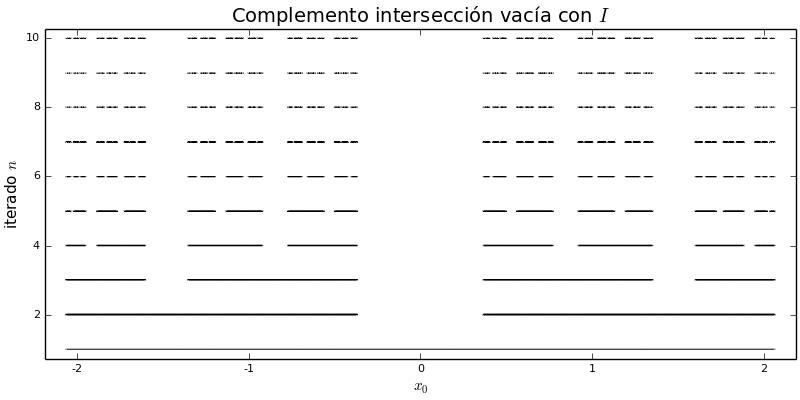

In [131]:
scatter(ylims=(0:11), legend=false, size=(800, 400))

for i in 1:length(comple_int_I[1,:])

    scatter!(I_rango, comple_int_I[:, i] , markersize=(0.001))
    
end
ylabel!(L"iterado $n$")
xlabel!(L"x_0")
title!(L"Complemento intersección vacía con $I$")
scatter!()

> La figura arriba muestra el complemento de la figura anterior. En cada renglón grafica las condiones iniciales que no salen de $I$, conforme se va iterando la función $f(x) = x^2 -2.2$. A esto se le conoce como el conjunto de Cantor.

**Ejercicio 5:**

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de lyapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, ayuden al método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)


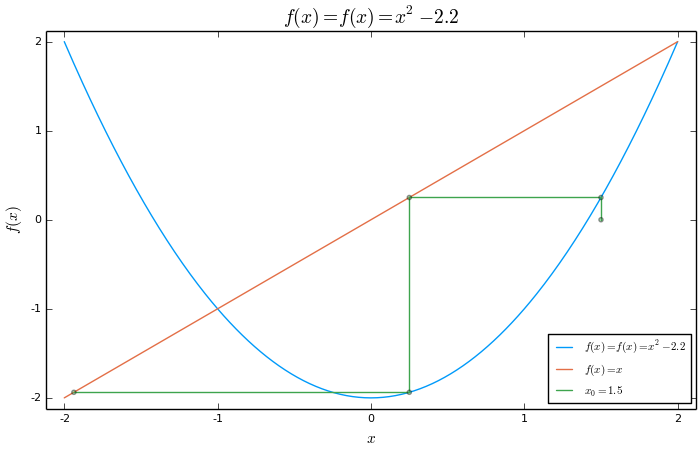

In [25]:
cobweb_plot(x -> x^2 -2, "f(x) = x^2 - 2.2", 1.5, -2:0.01:2, 2)